In [ ]:
# 행정단위 별 주차장 보유 시장 비율

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'

df = pd.read_excel('C:/Users/Admin/Desktop/wolsong (2)/data/주차장.xlsx', engine='openpyxl')
df.columns = ['시장명', '소재지도로명주소', '주차장보유여부']
df['주차장유무'] = df['주차장보유여부'].map({'Y': 1, 'N': 0})
df['행정단위'] = df['소재지도로명주소'].str.extract(
    r'(서울특별시|부산광역시|대구광역시|인천광역시|광주광역시|대전광역시|울산광역시|세종특별자치시|[가-힣]+도)'
)
total = df.groupby('행정단위').size()
with_parking = df[df['주차장유무'] == 1].groupby('행정단위').size()
ratio = (with_parking / total).sort_values(ascending=False)

plt.figure(figsize=(14, 7))
bars = plt.bar(ratio.index, ratio.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.0%}',
             ha='center', va='bottom', fontsize=9, color='white', weight='bold')

plt.title('광역 행정단위별 주차장 보유 시장 비율 (높은 순)', fontsize=17)
plt.xlabel('광역 행정단위', fontsize=12)
plt.ylabel('주차장 보유 비율', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)
plt.tightlayout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('광역단위주차장비율_다크테마.png', dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

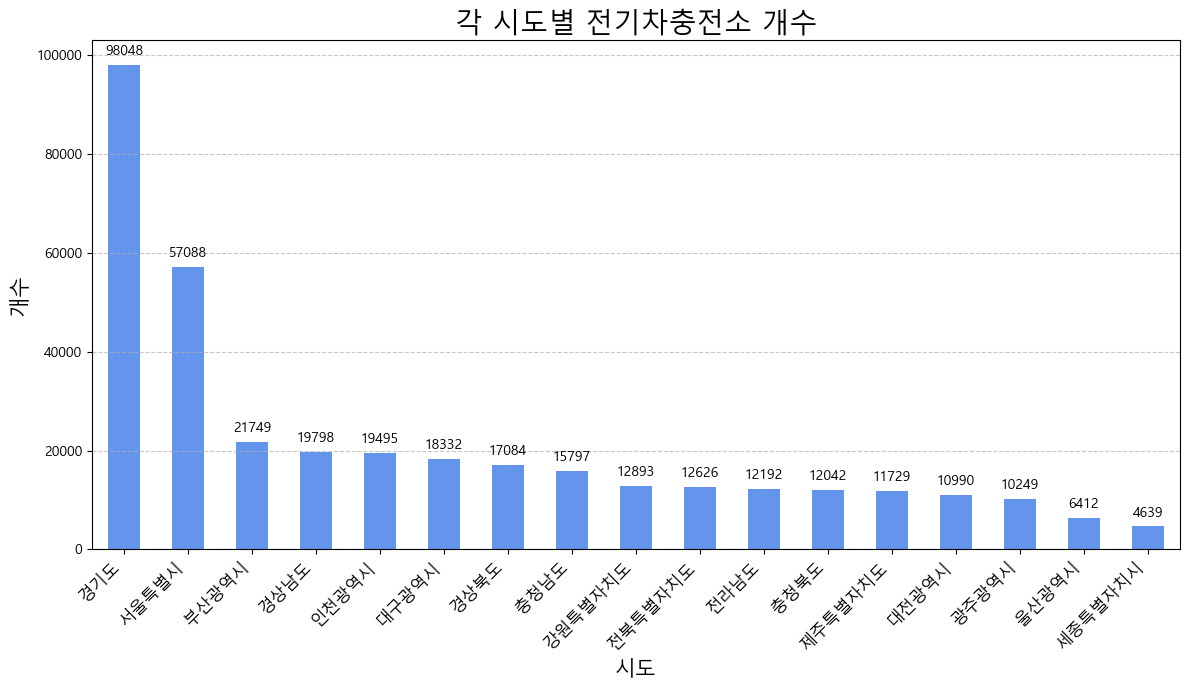

In [5]:
# 전기차충전소 개수

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\rhs69\Desktop\코리아IT\학원과제\데이터분석 프로젝트\데이터\전기차충전소.csv", encoding='euc-kr')
sido_counts = data['시도'].value_counts()


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지


ax = sido_counts.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12, 7), # 그래프 크기 설정
    color='cornflowerblue' # 막대 색상 설정
)

# ----------------------------------------------------
# 4. 그래프 꾸미기 (제목, 축 레이블 등)
# ----------------------------------------------------
plt.title('각 시도별 전기차충전소 개수', fontsize=20)
plt.xlabel('시도', fontsize=15)
plt.ylabel('개수', fontsize=15)

# x축 레이블 회전 및 정렬
plt.xticks(rotation=45, ha='right', fontsize=12)

# 가독성을 위해 y축에 그리드(격자) 선 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 개수 값 직접 표시
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

# 그래프 레이아웃 자동 조정
plt.tight_layout()

# ----------------------------------------------------
# 5. 그래프 파일로 저장
# ----------------------------------------------------
plt.savefig('sido_counts_bar_chart.png')

C:\Users\rhs69\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


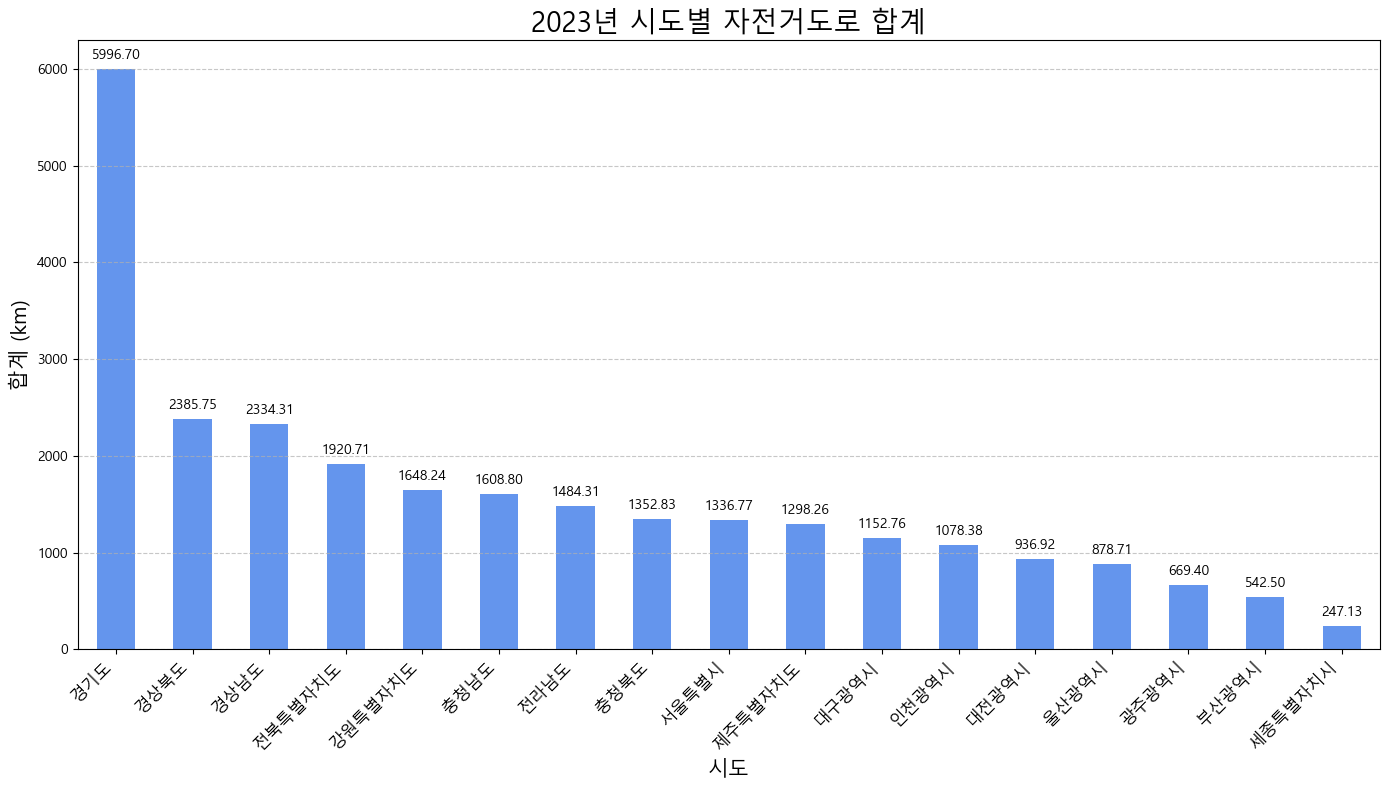

In [6]:
# 자전거 도로 현황

import pandas as pd
import matplotlib.pyplot as plt

file_name = r"C:\Users\rhs69\Desktop\코리아IT\학원과제\데이터분석 프로젝트\데이터\자전거도로_현황_20250804171052.xlsx"

try:
    df = pd.read_excel(file_name, header=[0, 1])
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로 확인")
    exit()


sido_col = ('시도별(1)', '시도별(1)')
total_col = ('2023', '합계')

# '전국' 행을 제거하고, '시도별'을 인덱스
df = df[df[sido_col] != '전국']
df.set_index(sido_col, inplace=True)

# y축으로 사용할 '합계' 컬럼을 선택
sido_totals = df[total_col]


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 개수가 많은 순서대로 막대를 정렬
ax = sido_totals.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(14, 8),
    color='cornflowerblue'
)

# ----------------------------------------------------
# 4. 그래프 꾸미기 및 저장
# ----------------------------------------------------
plt.title('2023년 시도별 자전거도로 합계', fontsize=20)
plt.xlabel('시도', fontsize=15)
plt.ylabel('합계 (km)', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.tight_layout()

plt.savefig('sido_bike_data_bar_chart_final.png')

C:\Users\rhs69\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


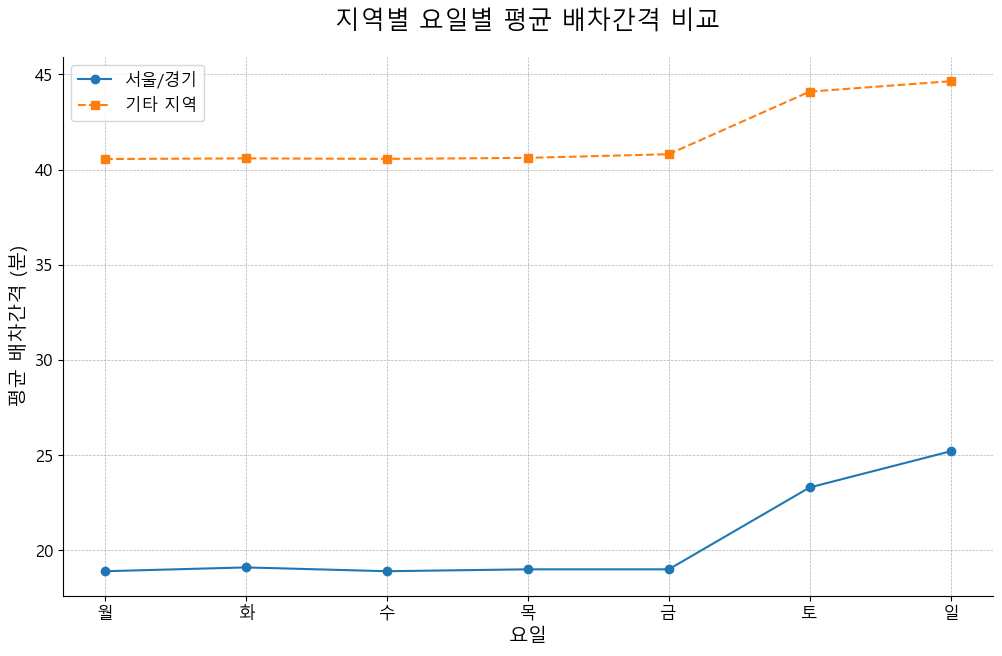

In [7]:
# 수도권과 지방의 버스배차간격

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 이전에 발생한 오류들을 해결하기 위해 read_excel을 사용하여 데이터를 로드합니다.
try:
    df = pd.read_excel(r"C:\Users\rhs69\Desktop\코리아IT\학원과제\데이터분석 프로젝트\데이터\버스배차간격.xlsx", skiprows=6, engine='openpyxl')

    # --- 데이터프레임 가공 (이전 단계와 동일) ---
    df = df.rename(columns={'Unnamed: 0': '구분'})
    df = df.rename(columns=lambda x: str(x).strip())
    df.columns = ['구분', '월', '화', '수', '목', '금', '토', '일', '강우', '강설']

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()

    days = ['월', '화', '수', '목', '금', '토', '일']
    for day in days:
        df[day] = pd.to_numeric(df[day], errors='coerce')

    seoul_gyeonggi_filter = df['구분'].isin(['서울특별시', '경기도'])
    seoul_gyeonggi_df = df[seoul_gyeonggi_filter]
    other_regions_df = df[~seoul_gyeonggi_filter]

    seoul_gyeonggi_avg = seoul_gyeonggi_df[days].mean()
    other_regions_avg = other_regions_df[days].mean()

    average_df = pd.DataFrame({
        '서울/경기': seoul_gyeonggi_avg,
        '기타 지역': other_regions_avg
    }).T
    # --- 데이터프레임 생성 완료 ---


    # --- 시각화 코드 ---

    # 한글 폰트 설정
    try:
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_prop = fm.FontProperties(fname=font_path)
        plt.rc('font', family=font_prop.get_name())
    except FileNotFoundError:
        # 시스템에 설치된 다른 한글 폰트 사용 (Windows: 'Malgun Gothic', macOS: 'AppleGothic')
        # 아래 이름들을 시스템에 맞게 수정하여 사용할 수 있습니다.
        if fm.findSystemFonts(fontext='ttf'):
             plt.rc('font', family='Malgun Gothic' if 'Malgun Gothic' in [f.name for f in fm.fontManager.ttflist] else 'AppleGothic')
        else:
            print("경고: 한글 폰트를 찾을 수 없어 그래프의 글자가 깨질 수 있습니다.")

    plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

    # 그래프 크기 설정
    plt.figure(figsize=(12, 7))

    # '서울/경기'와 '기타 지역'의 데이터를 각각 라인 플롯으로 그립니다.
    # marker='o'는 데이터 포인트를 원으로 표시, linestyle='-'는 실선을 의미합니다.
    plt.plot(average_df.columns, average_df.loc['서울/경기'], marker='o', linestyle='-', label='서울/경기')
    plt.plot(average_df.columns, average_df.loc['기타 지역'], marker='s', linestyle='--', label='기타 지역')

    # 그래프 제목 및 축 레이블 설정 (폰트 크기 지정)
    plt.title('지역별 요일별 평균 배차간격 비교', fontsize=18, pad=20)
    plt.xlabel('요일', fontsize=14)
    plt.ylabel('평균 배차간격 (분)', fontsize=14)

    # y축 눈금 설정
    plt.yticks(fontsize=12)
    # x축 눈금 설정
    plt.xticks(fontsize=12)

    # 범례 표시
    plt.legend(fontsize=12)

    # 그리드 추가하여 가독성 향상
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # 그래프 상단과 우측 테두리 제거
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 그래프 이미지 파일로 저장
    plt.savefig('bus_interval_comparison.png')

except FileNotFoundError:
    print("파일을 찾을 수 없습니다: '버스배차간격.xlsx - Sheet0.csv'")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

In [ ]:
# 코로나 이후 매출 변화?

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.family'] = 'Malgun Gothic'

df = pd.read_excel('./data/온누리.xlsx', engine='openpyxl')

plt.style.use('darkbackground')

df['코로나이전평균'] = df[[col for col in df.columns if '2015' in col or '2016' in col or '2017' in col or '2018' in col or '2019' in col]].mean(axis=1)
df['코로나이후평균'] = df[[col for col in df.columns if '2020' in col or '2021' in col or '2022' in col or '2023' in col or '2024' in col]].mean(axis=1)

plt.figure(figsize=(12, 6))

x = df['구분']

before = df['코로나이전평균']
after = df['코로나이후_평균']

plt.bar(x, before, label='코로나 이전 (2015~2019)', width=0.4, color='yellow')
plt.bar(x, after, bottom=before, label='코로나 이후 (2020~2024)', width=0.4, color='skyblue')

plt.title('전통시장 지역별 온누리상품권 회수금액 변화 (코로나 전후 비교)', fontsize=14)
plt.xlabel('지역', fontsize=12)
plt.ylabel('평균 회수금액 (억원)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend()
plt.tightlayout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('코로나전후온누리다크테마', dpi=300, bbox_inches='tight', facecolor='black')

plt.show()

In [ ]:
# 수도권 vs 지방 청년몰 분포 (파이 그래프, 막대 그래프)



In [ ]:
# 연령별 평균 인터넷 쇼핑몰 이용률
# 연령대별 인터넷 쇼핑 이용률 추이(2022 - 2024)
# 연도별 평균 인터넷쇼핑 이용률

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =========================================================
# 0) 환경 설정
#  - 한글 폰트(맥: AppleGothic), 마이너스 깨짐 방지
# =========================================================
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# =========================================================
# 1) 데이터 로드 및 기본 점검
# =========================================================
df = pd.read_csv('인터넷쇼핑.csv', encoding='cp949')

print("=== 데이터 기본 정보 ===")
print(f"데이터 형태: {df.shape}")
print("\n=== 컬럼명 ===")
print(df.columns.tolist())

# ---------------------------------------------------------
# ※ 원시 파일 구조: 첫 행이 실제 컬럼명이라서
#   -> 첫 행을 컬럼으로 올리고, 본문 데이터만 남긴다.
# ---------------------------------------------------------
df_cleaned = df.copy()
df_cleaned.columns = df_cleaned.iloc[0]     # 첫 행 → 컬럼명
df_cleaned = df_cleaned.iloc[1:].reset_index(drop=True)

print("\n=== 정리된 데이터 (head) ===")
print(df_cleaned.head())

# =========================================================
# 2) 연령대별 데이터 추출
#    - 1열: '전체' (성별/지역 등 전체), 2열: '연령대'
#    - 2022, 2023, 2024 값이 각각 열 인덱스 2, 8, 14 에 있다고 가정
#      (파일 포맷 고정 전제. 바뀌면 인덱스 조정 필요)
# =========================================================
age_block = df_cleaned[df_cleaned.iloc[:, 0] == '전체'].copy()
age_block = age_block[age_block.iloc[:, 1] != '전체'].copy()

shopping_rates, ages, years = [], [], []
for _, row in age_block.iterrows():
    age = row.iloc[1]
    # ---- 2022 (열 인덱스 2) ----
    try:
        shopping_rates.append(float(row.iloc[2]));   ages.append(age); years.append(2022)
    except: pass
    # ---- 2023 (열 인덱스 8) ----
    try:
        shopping_rates.append(float(row.iloc[8]));   ages.append(age); years.append(2023)
    except: pass
    # ---- 2024 (열 인덱스 14) ----
    try:
        shopping_rates.append(float(row.iloc[14]));  ages.append(age); years.append(2024)
    except: pass

analysis_df = pd.DataFrame({
    '연령대': ages,
    '연도': years,
    '인터넷쇼핑이용률': shopping_rates
})
print("\n=== 분석용 데이터 (head) ===")
print(analysis_df.head(10))

# =========================================================
# 3) 이상치 제거 (IQR)
# =========================================================
Q1 = analysis_df['인터넷쇼핑이용률'].quantile(0.25)
Q3 = analysis_df['인터넷쇼핑이용률'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

print(f"\n=== 이상치 제거 전 ===")
print(f"데이터 개수: {len(analysis_df)}")
print(f"IQR 기준: {lower:.2f} ~ {upper:.2f}")

cleaned_df = analysis_df[
    (analysis_df['인터넷쇼핑이용률'] >= lower) &
    (analysis_df['인터넷쇼핑이용률'] <= upper)
]
print(f"\n=== 이상치 제거 후 ===")
print(f"데이터 개수: {len(cleaned_df)}")
print(f"제거된 이상치: {len(analysis_df) - len(cleaned_df)}개")

# =========================================================
# 4) 시각화 (4 in 1 Figure)
#    ① (좌상) 연령대별 추이 Line
#    ② (우상) 연령대 평균 Bar
#    ③ (좌하) 연도별 평균 Line
#    ④ (우하) 이상치 전/후 Boxplot
# =========================================================
plt.figure(figsize=(15, 10))

# ---------- ① 연령대별 인터넷쇼핑 이용률 추이 ----------
plt.subplot(2, 2, 1)
for age in cleaned_df['연령대'].unique():
    tmp = cleaned_df[cleaned_df['연령대'] == age].sort_values('연도')
    plt.plot(tmp['연도'], tmp['인터넷쇼핑이용률'], marker='o', label=age)
plt.title('연령대별 인터넷쇼핑 이용률 추이 (2022-2024)')
plt.xlabel('연도'); plt.ylabel('인터넷쇼핑 이용률 (%)')
plt.legend(); plt.grid(True, alpha=0.3)

# ---------- ② 연령대별 평균 이용률 (Bar) ----------
plt.subplot(2, 2, 2)
age_avg = cleaned_df.groupby('연령대')['인터넷쇼핑이용률'].mean().sort_values(ascending=False)
age_avg.plot(kind='bar')  # 색은 기본값(규정 준수)
plt.title('연령대별 평균 인터넷쇼핑 이용률')
plt.xlabel('연령대'); plt.ylabel('평균 이용률 (%)')
plt.xticks(rotation=45); plt.grid(True, alpha=0.3)

# ---------- ③ 연도별 평균 이용률 (Line) ----------
plt.subplot(2, 2, 3)
year_avg = cleaned_df.groupby('연도')['인터넷쇼핑이용률'].mean()
year_avg.plot(kind='line', marker='o', linewidth=2)  # 색 기본값
plt.title('연도별 평균 인터넷쇼핑 이용률')
plt.xlabel('연도'); plt.ylabel('평균 이용률 (%)')
plt.grid(True, alpha=0.3)

# ---------- ④ 이상치 제거 전/후 Boxplot ----------
plt.subplot(2, 2, 4)
plt.boxplot(
    [analysis_df['인터넷쇼핑이용률'], cleaned_df['인터넷쇼핑이용률']],
    labels=['이상치 제거 전', '이상치 제거 후']
)
plt.title('이상치 제거 전후 비교')
plt.ylabel('인터넷쇼핑 이용률 (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('인터넷쇼핑_분석_결과.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================================================
# 5) 통계 요약
# =========================================================
print("\n=== 통계 분석 결과 ===")
print(f"전체 평균 이용률: {cleaned_df['인터넷쇼핑이용률'].mean():.2f}%")
print(f"전체 표준편차: {cleaned_df['인터넷쇼핑이용률'].std():.2f}%")

print("\n=== 연령대별 통계 ===")
print(cleaned_df.groupby('연령대')['인터넷쇼핑이용률'].agg(['mean', 'std', 'count']))

print("\n=== 연도별 통계 ===")
print(cleaned_df.groupby('연도')['인터넷쇼핑이용률'].agg(['mean', 'std', 'count']))

# =========================================================
# 6) 디지털 접근성(=인터넷쇼핑 이용률) 가설용 보조 분석
#    - 순위, 연도별 변화율, 변화율 상관
# =========================================================
print("\n=== 디지털 접근성 → 전통시장 이용 가설 분석 ===")
digital_access = cleaned_df.groupby('연령대')['인터넷쇼핑이용률'].mean().sort_values(ascending=False)

print("디지털 접근성 순위 (인터넷쇼핑 이용률 기준):")
for i, (age, rate) in enumerate(digital_access.items(), 1):
    print(f"{i}. {age}: {rate:.1f}%")

# ---- 연도별 변화율 표 만들기 ----
yearly_change = cleaned_df.groupby(['연령대', '연도'])['인터넷쇼핑이용률'].mean().unstack()
yearly_change['2022-2023_변화율'] = (yearly_change[2023] - yearly_change[2022]) / yearly_change[2022] * 100
yearly_change['2023-2024_변화율'] = (yearly_change[2024] - yearly_change[2023]) / yearly_change[2023] * 100

print("\n연령대별 디지털 접근성 변화율:")
print(yearly_change[['2022-2023_변화율', '2023-2024_변화율']].round(2))

corr = yearly_change[['2022-2023_변화율', '2023-2024_변화율']].corr().iloc[0, 1]
print(f"\n변화율 간 상관관계: {corr:.3f}")

print("\n=== 분석 결과 요약 ===")
print("1) 디지털 접근성이 가장 높은 연령대 Top3:")
for age, rate in digital_access.head(3).items():
    print(f"   - {age}: {rate:.1f}%")
print("\n2) 연령대별 증가 추세(+/-):")
for age in digital_access.index:
    print(f"   - {age}: 2022→2023 {yearly_change.loc[age, '2022-2023_변화율']:+.1f}%, "
          f"2023→2024 {yearly_change.loc[age, '2023-2024_변화율']:+.1f}%")
print("\n3) 가설 코멘트:")
print("   - 20~30대에서 높은 이용률과 증가세가 확인됨 → 전통시장 디지털 전환 수용 가능성 시사")
print("   - 실제 전통시장 이용(방문/매출) 지표와의 결합 분석이 필요(인과 보완)")